In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
!ls

PLO-02-04-2025.txt  PLO_020425.txt  PLO_260325_savnet.txt  Untitled.ipynb


In [200]:
pavnet = pd.read_csv("PLO-02-04-2025.txt", delimiter="\t",index_col=0, header=0)
savnet = pd.read_csv("PLO_030421_savnet.txt", delimiter="\t", index_col=0,  header=0)
savnetv = pd.read_csv("PLO_030421_v_savnet.txt", delimiter="\t", index_col=0,  header=0)

In [201]:
savnetv

,NAA-V Amp
time,
0,20.30103
1,19.69232
2,20.44978
3,20.58012
4,20.52775
...,...
86395,17.57850
86396,18.07137
86397,17.62937


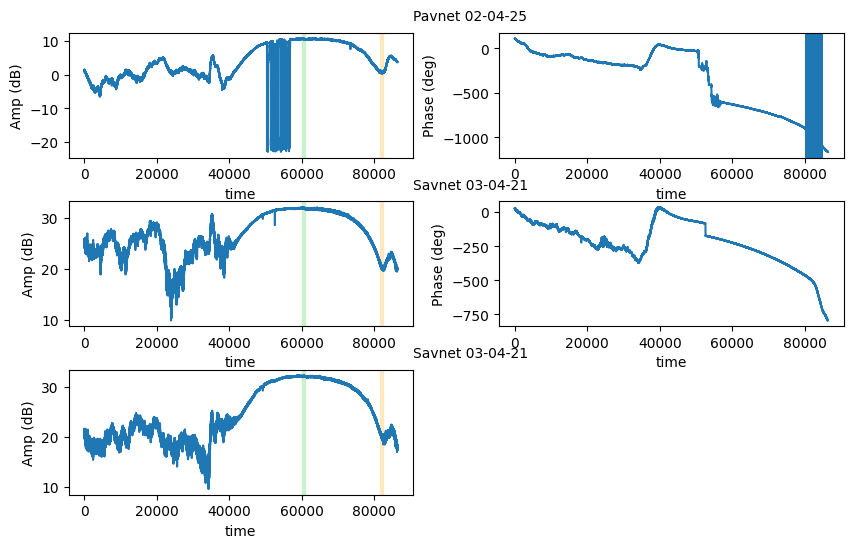

In [202]:
wlow = np.int32([81.5e3, 82.5e3])
whigh = np.int32([60e3, 61e3]) 
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(321); pavnet["NAA Amp"].plot() ; plt.ylabel("Amp (dB)")
plt.axvspan(*wlow, color="orange", alpha=0.2); plt.axvspan(*whigh, color="limegreen", alpha=0.2) 
plt.text(1,1.1,f"Pavnet 02-04-25", transform=ax.transAxes)
plt.subplot(322); pavnet["NAA Phase"].plot() ; plt.ylabel("Phase (deg)")
plt.axvspan(80e3, 85e3)

ax = plt.subplot(323); savnet["NAA Amp"].plot() ; plt.ylabel("Amp (dB)")
plt.axvspan(*wlow, color="orange", alpha=0.2); plt.axvspan(*whigh, color="limegreen", alpha=0.2) 
plt.text(1,1.1,f"Savnet 03-04-21", transform=ax.transAxes)
plt.subplot(324); savnet["NAA Phase"].plot() ; plt.ylabel("Phase (deg)")

ax = plt.subplot(325); savnetv["NAA-V Amp"].plot() ; plt.ylabel("Amp (dB)")
plt.axvspan(*wlow, color="orange", alpha=0.2); plt.axvspan(*whigh, color="limegreen", alpha=0.2) 
plt.text(1,1.1,f"Savnet 03-04-21", transform=ax.transAxes)
#plt.subplot(325); savnetv["NAA-V Phase"].plot() ; plt.ylabel("Phase (deg)")

fig.subplots_adjust(hspace=0.35, wspace=0.25)


In [203]:
high_amp_pavnet = np.mean(pavnet["NAA Amp"][whigh[0]:whigh[1]])
low_amp_pavnet = np.mean(pavnet["NAA Amp"][wlow[0]:wlow[1]])
high_amp_savnet = np.mean(savnet["NAA Amp"][whigh[0]:whigh[1]])
low_amp_savnet = np.mean(savnet["NAA Amp"][wlow[0]:wlow[1]])
high_amp_savnetv = np.mean(savnetv["NAA-V Amp"][whigh[0]:whigh[1]])
low_amp_savnetv = np.mean(savnetv["NAA-V Amp"][wlow[0]:wlow[1]])
amp_range_pavnet = high_amp_pavnet - low_amp_pavnet
amp_range_savnet = high_amp_savnet - low_amp_savnet
amp_range_savnetv = high_amp_savnetv - low_amp_savnetv

print(f"""LOOP RANGES
 PAVNET {amp_range_pavnet:.2f}
 SAVNET {amp_range_savnet:.2f}
 SAVNET-V {amp_range_savnetv:.2f}
""")

LOOP RANGES
 PAVNET 9.75
 SAVNET 11.41
 SAVNET-V 11.85



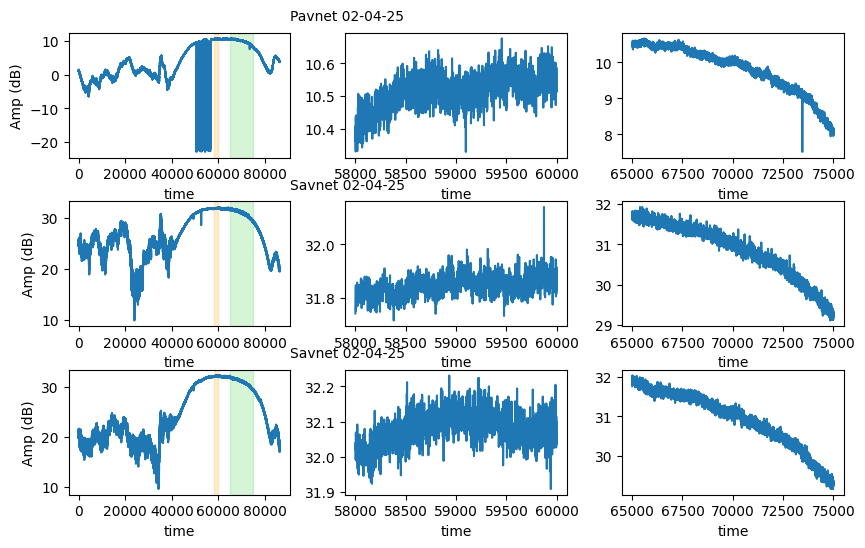

In [204]:
wref1= np.int32([58e3, 60e3])
wref2 = np.int32([65e3, 75e3]) 
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(331); pavnet["NAA Amp"].plot() ; plt.ylabel("Amp (dB)")
plt.axvspan(*wref1, color="orange", alpha=0.2); plt.axvspan(*wref2, color="limegreen", alpha=0.2) 
plt.text(1,1.1,f"Pavnet 02-04-25", transform=ax.transAxes)
plt.subplot(332); pavnet["NAA Amp"][ wref1[0]:wref1[1]].plot()
plt.subplot(333); pavnet["NAA Amp"][ wref2[0]:wref2[1]].plot()


ax = plt.subplot(334); savnet["NAA Amp"].plot() ; plt.ylabel("Amp (dB)")
plt.axvspan(*wref1, color="orange", alpha=0.2); plt.axvspan(*wref2, color="limegreen", alpha=0.2) 
plt.text(1,1.1,f"Savnet 02-04-25", transform=ax.transAxes)
plt.subplot(335); savnet["NAA Amp"][wref1[0]:wref1[1]].plot()
plt.subplot(336); savnet["NAA Amp"][wref2[0]:wref2[1]].plot()

ax = plt.subplot(337); savnetv["NAA-V Amp"].plot() ; plt.ylabel("Amp (dB)")
plt.axvspan(*wref1, color="orange", alpha=0.2); plt.axvspan(*wref2, color="limegreen", alpha=0.2) 
plt.text(1,1.1,f"Savnet 02-04-25", transform=ax.transAxes)
plt.subplot(338); savnetv["NAA-V Amp"][wref1[0]:wref1[1]].plot()
plt.subplot(339); savnetv["NAA-V Amp"][wref2[0]:wref2[1]].plot()

fig.subplots_adjust(hspace=0.35, wspace=0.25)

In [205]:
y = pavnet["NAA Amp"][wref1[0]:wref1[1]].values
x = pavnet["NAA Amp"][wref1[0]:wref1[1]].index.values
p = np.polyfit(x,y,5)
pavnet_fit_ref1 = np.polyval(p,x)

y = pavnet["NAA Amp"][wref2[0]:wref2[1]].values
x = pavnet["NAA Amp"][wref2[0]:wref2[1]].index.values
p = np.polyfit(x,y,5)
pavnet_fit_ref2 = np.polyval(p,x)

y = savnet["NAA Amp"][wref1[0]:wref1[1]].values
x = savnet["NAA Amp"][wref1[0]:wref1[1]].index.values
p = np.polyfit(x,y,5)
savnet_fit_ref1 = np.polyval(p,x)

y = savnet["NAA Amp"][wref2[0]:wref2[1]].values
x = savnet["NAA Amp"][wref2[0]:wref2[1]].index.values
p = np.polyfit(x,y,5)
savnet_fit_ref2 = np.polyval(p,x)

y = savnetv["NAA-V Amp"][wref1[0]:wref1[1]].values
x = savnetv["NAA-V Amp"][wref1[0]:wref1[1]].index.values
p = np.polyfit(x,y,5)
savnetv_fit_ref1 = np.polyval(p,x)

y = savnetv["NAA-V Amp"][wref2[0]:wref2[1]].values
x = savnetv["NAA-V Amp"][wref2[0]:wref2[1]].index.values
p = np.polyfit(x,y,5)
savnetv_fit_ref2 = np.polyval(p,x)


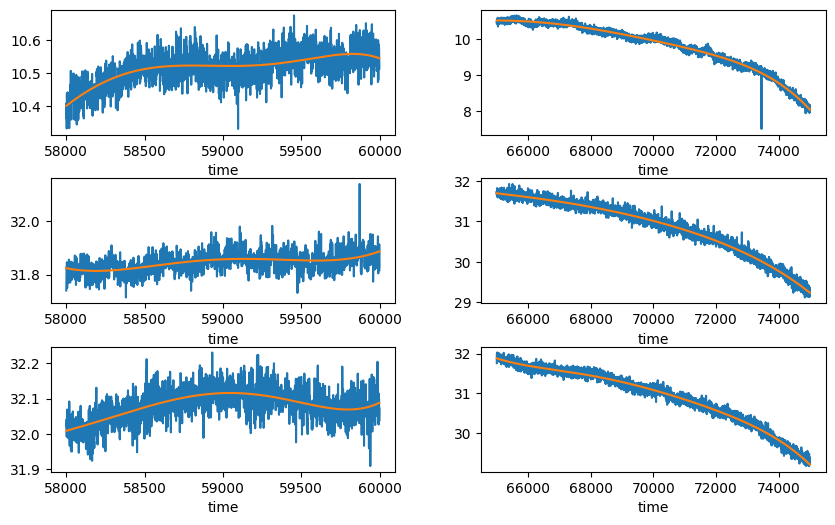

In [210]:
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(321)
pavnet["NAA Amp"][ wref1[0]:wref1[1]].plot()
x = pavnet["NAA Amp"][ wref1[0]:wref1[1]].index.values
plt.plot(x, pavnet_fit_ref1)

plt.subplot(322); pavnet["NAA Amp"][ wref2[0]:wref2[1]].plot()
x = pavnet["NAA Amp"][ wref2[0]:wref2[1]].index.values
plt.plot(x, pavnet_fit_ref2)

ax = plt.subplot(323)
savnet["NAA Amp"][ wref1[0]:wref1[1]].plot()
x = savnet["NAA Amp"][ wref1[0]:wref1[1]].index.values
plt.plot(x, savnet_fit_ref1)

plt.subplot(324); 
savnet["NAA Amp"][ wref2[0]:wref2[1]].plot()
x = savnet["NAA Amp"][ wref2[0]:wref2[1]].index.values
plt.plot(x, savnet_fit_ref2)

ax = plt.subplot(325)
savnetv["NAA-V Amp"][ wref1[0]:wref1[1]].plot()
x = savnetv["NAA-V Amp"][ wref1[0]:wref1[1]].index.values
plt.plot(x, savnetv_fit_ref1)

plt.subplot(326); 
savnetv["NAA-V Amp"][ wref2[0]:wref2[1]].plot()
x = savnetv["NAA-V Amp"][ wref2[0]:wref2[1]].index.values
plt.plot(x, savnetv_fit_ref2)


fig.subplots_adjust(hspace=0.35, wspace=0.25)

In [206]:
# mse
# pavnet
pavnet_rmse_r1 = np.sqrt(np.sum((pavnet["NAA Amp"][ wref1[0]:wref1[1]]-pavnet_fit_ref1)**2)/len(pavnet_fit_ref1))
pavnet_rmse_r2 = np.sqrt(np.sum((pavnet["NAA Amp"][ wref2[0]:wref2[1]]-pavnet_fit_ref2)**2)/len(pavnet_fit_ref2))
#savnet
savnet_rmse_r1 = np.sqrt(np.sum((savnet["NAA Amp"][ wref1[0]:wref1[1]]-savnet_fit_ref1)**2)/len(savnet_fit_ref1))
savnet_rmse_r2 = np.sqrt(np.sum((savnet["NAA Amp"][ wref2[0]:wref2[1]]-savnet_fit_ref2)**2)/len(savnet_fit_ref2))
#savnet-V
savnetv_rmse_r1 = np.sqrt(np.sum((savnetv["NAA-V Amp"][ wref1[0]:wref1[1]]-savnetv_fit_ref1)**2)/len(savnetv_fit_ref1))
savnetv_rmse_r2 = np.sqrt(np.sum((savnetv["NAA-V Amp"][ wref2[0]:wref2[1]]-savnetv_fit_ref2)**2)/len(savnetv_fit_ref2))

print(f"""
RMSE ref1 P: {pavnet_rmse_r1:3.3f} ; S: {savnet_rmse_r1:3.3f} ; S-V: {savnetv_rmse_r1:3.3f}
RMSE ref2 P: {pavnet_rmse_r2:3.3f} ; S: {savnet_rmse_r2:3.3f} ; S-V: {savnetv_rmse_r2:3.3f}
""")


RMSE ref1 P: 0.040 ; S: 0.033 ; S-V: 0.036
RMSE ref2 P: 0.070 ; S: 0.073 ; S-V: 0.072



/tmp/ipykernel_441209/1886564804.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


[Text(0.0, 0, ''),
 Text(1.0, 0, 'Ref 1'),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, 'Ref 2'),
 Text(5.0, 0, ''),
 Text(6.0, 0, '')]

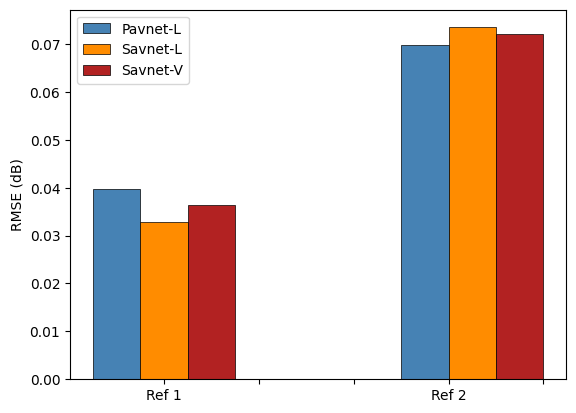

In [213]:
plt.bar(0.5, pavnet_rmse_r1, width=0.5, align="center", color="steelblue", label="Pavnet-L", edgecolor="k", linewidth=0.5)
plt.bar(1.0, savnet_rmse_r1, width=0.5, align="center", color="darkorange", label="Savnet-L", edgecolor="k", linewidth=0.5)
plt.bar(1.5, savnetv_rmse_r1, width=0.5, align="center", color="firebrick", label="Savnet-V", edgecolor="k", linewidth=0.5)
plt.legend()
plt.bar(3.75, pavnet_rmse_r2, width=0.5, align="center", color="steelblue", label="Pavnet", edgecolor="k", linewidth=0.5)
plt.bar(4.25, savnet_rmse_r2, width=0.5, align="center", color="darkorange", label="Savnet", edgecolor="k", linewidth=0.5)
plt.bar(4.75, savnetv_rmse_r2, width=0.5, align="center", color="firebrick", label="Savnet", edgecolor="k", linewidth=0.5)

plt.ylabel("RMSE (dB)")
ax= plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["" for l in labels]
labels[1] = 'Ref 1'
labels[4] = "Ref 2"
#ax1.set_xticklabels(squad, minor=False, rotation=45)
ax.set_xticklabels(labels)

In [169]:
def mov_snr(s, w):
    
    """
    |... ----------v--------- ...|
         [i-w/2    i    i+w/2]
    """
    
    snr_arr = []
    side = w//2 # half the window
    s_ = np.concat((s[side:0:-1], s, s[-2:-side-2:-1]))
    i = 0 # pos index
    
    mean_arr = np.zeros(s.shape)
    se_arr = np.zeros(s.shape) # standard error arrray
    while i<len(s):
        mean = np.mean(s_[i:i+w])
        sigma = np.std(s_[i:i+w])
        se = sigma/np.sqrt(w)
        mean_arr[i] = mean
        se_arr[i] = se
        i += 1
    return mean_arr, se_arr

In [93]:
savnet_mean, savnet_serror = mov_snr(savnet["NAA Amp"][wref1[0]:wref1[1]].values)

In [170]:
pavnet_mean_r1, pavnet_serror_r1 = mov_snr(pavnet["NAA Amp"][wref1[0]:wref1[1]].values, w=21)
savnet_mean_r1, savnet_serror_r1 = mov_snr(savnet["NAA Amp"][wref1[0]:wref1[1]].values, w=21)
snr_pavnet_r1 = pavnet_mean_r1/pavnet_serror_r1
snr_savnet_r1 = savnet_mean_r1/savnet_serror_r1

pavnet_mean_r2, pavnet_serror_r2 = mov_snr(pavnet["NAA Amp"][wref2[0]:wref2[1]].values, w=21)
savnet_mean_r2, savnet_serror_r2 = mov_snr(savnet["NAA Amp"][wref2[0]:wref2[1]].values, w=21)
snr_pavnet_r2 = pavnet_mean_r2/pavnet_serror_r2
snr_savnet_r2 = savnet_mean_r2/savnet_serror_r2



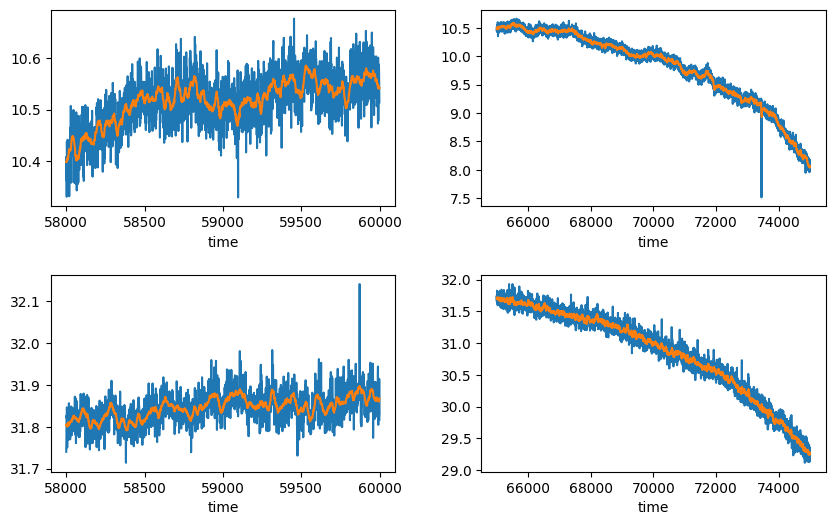

In [171]:
wref1= np.int32([58e3, 60e3])
wref2 = np.int32([65e3, 75e3]) 
fig = plt.figure(figsize=(10,6))

ax = plt.subplot(221)
pavnet["NAA Amp"][ wref1[0]:wref1[1]].plot()
x = pavnet["NAA Amp"][ wref1[0]:wref1[1]].index.values
plt.plot(x, pavnet_mean_r1)

plt.subplot(222); pavnet["NAA Amp"][ wref2[0]:wref2[1]].plot()
x = pavnet["NAA Amp"][ wref2[0]:wref2[1]].index.values
plt.plot(x, pavnet_mean_r2)

ax = plt.subplot(223)
savnet["NAA Amp"][ wref1[0]:wref1[1]].plot()
x = savnet["NAA Amp"][ wref1[0]:wref1[1]].index.values
plt.plot(x, savnet_mean_r1)

plt.subplot(224); 
savnet["NAA Amp"][ wref2[0]:wref2[1]].plot()
x = savnet["NAA Amp"][ wref2[0]:wref2[1]].index.values
plt.plot(x, savnet_mean_r2)
fig.subplots_adjust(hspace=0.35, wspace=0.25)

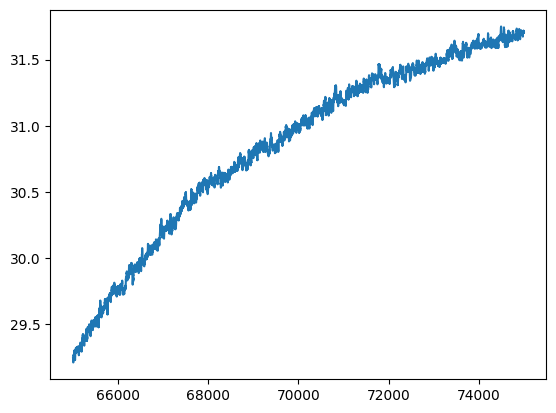

In [157]:

plt.plot(x, savnet_mean_r2)

In [148]:
a

array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4])

In [133]:
s[d:0:-1]

array([5, 4, 3, 2, 1])